In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('audit_risk.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
df.shape

(776, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [5]:
df = df.drop('LOCATION_ID',1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.8900,55.5700,59.8500
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.8750,2.4800,85.0000
Score_A,776.0,0.351289,0.174055,0.20,0.2000,0.2000,0.6000,0.6000
Risk_A,776.0,1.351029,3.440447,0.00,0.0420,0.1750,1.4880,51.0000
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.4050,4.1600,1264.6300
Score_B,776.0,0.313144,0.169804,0.20,0.2000,0.2000,0.4000,0.6000
Risk_B,776.0,6.334008,30.072845,0.00,0.0000,0.0810,1.8405,758.7780
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.3700,7.7075,1268.9100
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.0000,5.0000,9.0000
Score_B.1,776.0,0.223711,0.080352,0.20,0.2000,0.2000,0.2000,0.6000


In [7]:
df = df.drop('Detection_Risk',1)

In [8]:
x = df.drop('Risk',1)

In [9]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,-0.670465,0.304800,1.429846,0.336502,-1.658295e-01,-0.666752,-0.194121,-0.127506,-0.255998,-0.295285,...,-0.411402,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.352503,-0.166468,-0.388662,-0.141123
1,-0.670465,-0.431736,-0.869761,-0.392943,-1.192773e-01,-0.666752,-0.178615,-0.163583,-0.255998,-0.295285,...,-0.411402,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.276513,-0.388662,-0.172280
2,-0.670465,-0.341872,-0.869761,-0.363277,-2.111829e-01,-0.666752,-0.209227,-0.243341,-0.255998,-0.295285,...,-0.411402,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.294902,-0.388662,-0.177487
3,-0.670465,-0.431736,-0.869761,-0.392943,2.317208e-07,1.690422,0.004858,-0.047162,3.527894,4.686039,...,-0.411402,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,1.977497,-0.002753,-0.388662,-0.094770
4,-0.670465,-0.431736,-0.869761,-0.392943,-2.141798e-01,-0.666752,-0.210226,-0.256212,-0.255998,-0.295285,...,-0.411402,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.297315,-0.388662,-0.178170


In [25]:
df_scaled =df_scaled.dropna()

In [24]:
df_scaled=x_scaled[~((x_scaled<(-3)) | (x_scaled>(3))).any(axis=1)]
df_scaled.shape

(716, 24)

In [26]:
kmeans = KMeans()
err = []
for i in range(1,10):
    model = KMeans(i)
    model.fit(df_scaled)
    model.inertia_
    err.append(model.inertia_)

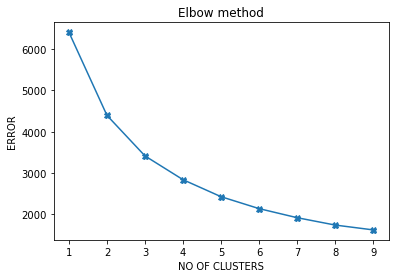

In [27]:
plt.plot(range(1,10),err,marker='X')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('ERROR')
plt.title('Elbow method')
plt.show()

In [28]:
for clusters in range(2,10):
    model  = KMeans(clusters)
    model.fit(df_scaled)
    sil_score = silhouette_score(df_scaled,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.44785571314102435
silhouette_score for 3 clusters: 0.4587686828908976
silhouette_score for 4 clusters: 0.39175942164947875
silhouette_score for 5 clusters: 0.4133512785328582
silhouette_score for 6 clusters: 0.4298008406169559
silhouette_score for 7 clusters: 0.4411529426562338
silhouette_score for 8 clusters: 0.4662214417405537
silhouette_score for 9 clusters: 0.4727269351051304


In [29]:
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [30]:
df_k = df_scaled.copy()
df_k['labels'] = labels

In [31]:
df_k.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,labels
0,-0.670465,0.304800,1.429846,0.336502,-0.165829,-0.666752,-0.194121,-0.127506,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.352503,-0.166468,-0.388662,-0.141123,0
1,-0.670465,-0.431736,-0.869761,-0.392943,-0.119277,-0.666752,-0.178615,-0.163583,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.276513,-0.388662,-0.172280,0
2,-0.670465,-0.341872,-0.869761,-0.363277,-0.211183,-0.666752,-0.209227,-0.243341,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.294902,-0.388662,-0.177487,0
4,-0.670465,-0.431736,-0.869761,-0.392943,-0.214180,-0.666752,-0.210226,-0.256212,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.297315,-0.388662,-0.178170,0
5,-0.670465,-0.431736,-0.869761,-0.392943,-0.199195,-0.666752,-0.205235,-0.241586,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.283788,-0.388662,-0.174340,0


In [32]:
df_k['labels'].value_counts()

0    492
2    139
1     84
Name: labels, dtype: int64

# AgglomerativeClustering

In [33]:
link=['single','complete','average','ward','centroid']
for l in link:
    Z = linkage(df_scaled, method = l)
    c, coph_dist = cophenet(Z, pdist(df_scaled))
    print('Cophenetic value for ', l , 'is: ', c)
#as we ahve seen the Cophenetic score for avearge linkage method is high, 
#so we can consider for model building

Cophenetic value for  single is:  0.8241815302140865
Cophenetic value for  complete is:  0.8708905691656004
Cophenetic value for  average is:  0.9203791881552986
Cophenetic value for  ward is:  0.8182153084748456
Cophenetic value for  centroid is:  0.9211500234664376


In [34]:
c = [2,3,4] 
link=['single','complete','average','ward'] 
score= [] 
for i in c: 
    for l in link: 
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l) 
        cluster.fit(df_scaled) 
        label = cluster.labels_ 
        score = silhouette_score(df_scaled,label,random_state=10) 
        print('The score of', i ,'clusters and',l,'linkage is ',score)

    print('\n')

The score of 2 clusters and single linkage is  0.5475123399434667
The score of 2 clusters and complete linkage is  0.4676505938288514
The score of 2 clusters and average linkage is  0.5216931662749432
The score of 2 clusters and ward linkage is  0.47432973473781137


The score of 3 clusters and single linkage is  0.4998062267271192
The score of 3 clusters and complete linkage is  0.4579687743698699
The score of 3 clusters and average linkage is  0.49418821080616926
The score of 3 clusters and ward linkage is  0.42569219939433356


The score of 4 clusters and single linkage is  0.4978577659174681
The score of 4 clusters and complete linkage is  0.3102128814052865
The score of 4 clusters and average linkage is  0.45879147127316244
The score of 4 clusters and ward linkage is  0.3310375971515607




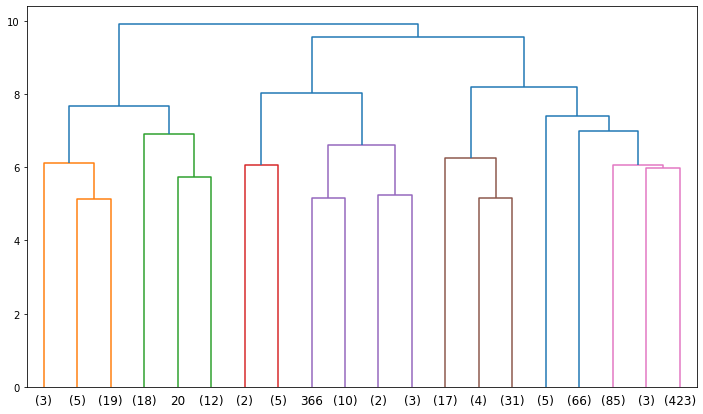

In [35]:
plt.figure(figsize=(12,7))
z_complete = linkage(df_scaled,method='complete')
dendrogram(z_complete,truncate_mode='lastp',p=20)
plt.show()

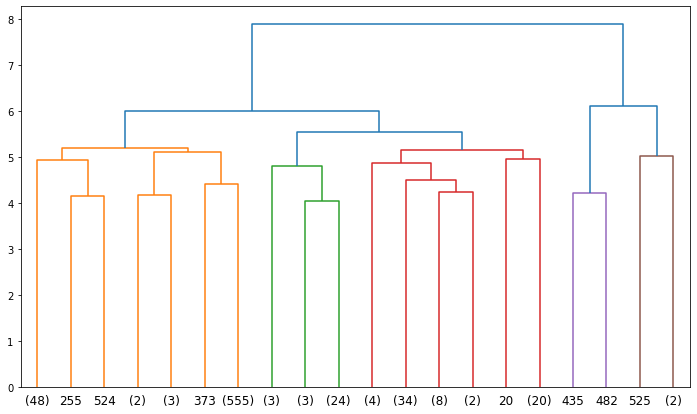

In [36]:
plt.figure(figsize=(12,7))
z_avg = linkage(df_scaled,method='average')
dendrogram(z_avg,truncate_mode='lastp',p=20)
plt.show()

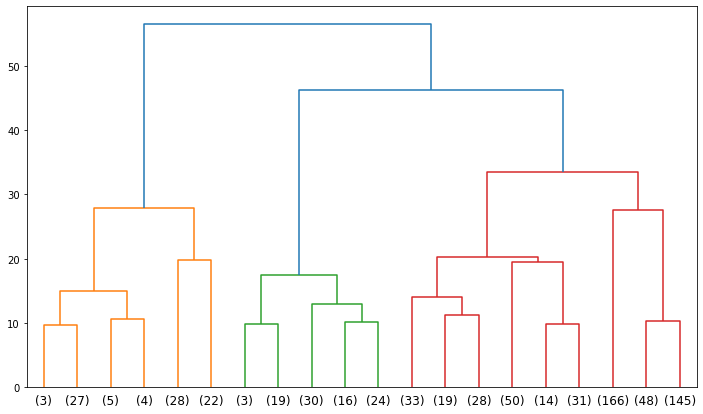

In [37]:
plt.figure(figsize=(12,7))
z_ward = linkage(df_scaled,method='ward')
dendrogram(z_ward,truncate_mode='lastp',p=20)
plt.show()

In [38]:
agg = AgglomerativeClustering(n_clusters=3,linkage='ward')
agg.fit(df_scaled)
labels_h = agg.labels_
df_h = df_scaled.copy()
df_h['Lables_h'] = labels_h
df_h.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Lables_h
0,-0.670465,0.304800,1.429846,0.336502,-0.165829,-0.666752,-0.194121,-0.127506,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.352503,-0.166468,-0.388662,-0.141123,0
1,-0.670465,-0.431736,-0.869761,-0.392943,-0.119277,-0.666752,-0.178615,-0.163583,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.276513,-0.388662,-0.172280,0
2,-0.670465,-0.341872,-0.869761,-0.363277,-0.211183,-0.666752,-0.209227,-0.243341,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.294902,-0.388662,-0.177487,0
4,-0.670465,-0.431736,-0.869761,-0.392943,-0.214180,-0.666752,-0.210226,-0.256212,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.297315,-0.388662,-0.178170,0
5,-0.670465,-0.431736,-0.869761,-0.392943,-0.199195,-0.666752,-0.205235,-0.241586,-0.255998,-0.295285,...,-0.16502,-0.410417,-0.196691,-0.246568,-0.175398,-0.818503,-0.283788,-0.388662,-0.174340,0


In [39]:
df_h['Lables_h'].value_counts()

0    534
2     92
1     89
Name: Lables_h, dtype: int64

# PCA

In [40]:
pca = PCA()
pca_df = pca.fit(df_scaled)
pca.explained_variance_

array([3.66282706e+00, 1.80068461e+00, 9.75037602e-01, 7.09356530e-01,
       5.40986750e-01, 4.26189044e-01, 3.72786450e-01, 2.04636678e-01,
       1.51930953e-01, 1.24537361e-01, 3.38105378e-03, 6.91755808e-04,
       9.34668072e-05, 5.64450346e-05, 3.41316067e-06, 3.06469850e-06,
       9.15480576e-32, 4.40888168e-32, 3.56380379e-32, 1.89032757e-32,
       1.21595832e-32, 8.40155981e-33, 2.20868204e-33, 5.88156102e-34])

In [41]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.4081962 , 0.60886978, 0.71753083, 0.79658361, 0.85687276,
       0.90436852, 0.94591293, 0.96871825, 0.98564988, 0.99952869,
       0.99990548, 0.99998257, 0.99999299, 0.99999928, 0.99999966,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

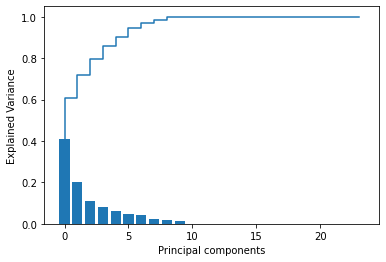

In [42]:
plt.bar(range(24),pca.explained_variance_ratio_)
plt.step(range(24),cumsum)
plt.xlabel('Principal components')
plt.ylabel('Explained Variance')
plt.show()

In [43]:
pca = PCA(n_components=0.95)
pca10 = pca.fit_transform(df_scaled)
pca10_df = pd.DataFrame(pca10,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
pca10_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.227214,-0.475588,-1.508125,-0.471340,-0.697788,0.814255,0.251638,-0.099238
1,-1.193486,-0.288462,-0.741936,0.646372,0.315997,-0.260945,-0.315129,0.194219
2,-1.206049,-0.282280,-0.769955,0.621167,0.286435,-0.218602,-0.306276,0.157173
3,-1.231370,-0.277344,-0.757116,0.642083,0.302986,-0.242229,-0.317074,0.104315
4,-1.218394,-0.280375,-0.750683,0.651471,0.310817,-0.245129,-0.303407,0.119102


In [44]:
pca10_df['Risk']  = df['Risk']

In [45]:
pca10_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Risk
0,0.227214,-0.475588,-1.508125,-0.471340,-0.697788,0.814255,0.251638,-0.099238,1
1,-1.193486,-0.288462,-0.741936,0.646372,0.315997,-0.260945,-0.315129,0.194219,0
2,-1.206049,-0.282280,-0.769955,0.621167,0.286435,-0.218602,-0.306276,0.157173,0
3,-1.231370,-0.277344,-0.757116,0.642083,0.302986,-0.242229,-0.317074,0.104315,1
4,-1.218394,-0.280375,-0.750683,0.651471,0.310817,-0.245129,-0.303407,0.119102,0


In [46]:
x = pca10_df.drop('Risk',1)
y = pca10_df.Risk
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2,random_state=10)
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
ypred_dt = model.predict(x_test)
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70        81
           1       0.62      0.65      0.63        62

    accuracy                           0.67       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.67      0.67      0.67       143



In [47]:
rf = RandomForestClassifier()
model_rf_pca = rf.fit(x_train,y_train)
ypred_rf = model_rf_pca.predict(x_test)
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        81
           1       0.63      0.63      0.63        62

    accuracy                           0.68       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.68      0.68      0.68       143



In [48]:
gb = GradientBoostingClassifier()
model_gb_pca = gb.fit(x_train,y_train)
ypred_gb = model_gb_pca.predict(x_test)
print(classification_report(y_test,ypred_gb))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        81
           1       0.62      0.66      0.64        62

    accuracy                           0.68       143
   macro avg       0.67      0.68      0.67       143
weighted avg       0.68      0.68      0.68       143

